In [1]:
import os
import sys
import random
import time
from random import seed, randint
import argparse
import platform
from datetime import datetime
import imp
import numpy as np
import fileinput
from itertools import product
import pandas as pd
from scipy.interpolate import griddata
from scipy.interpolate import interp2d
import seaborn as sns
from os import listdir

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import griddata
import matplotlib as mpl

%matplotlib inline


In [12]:
plt.rcParams['figure.figsize'] = [16.18033, 10]    #golden ratio
plt.rcParams['figure.facecolor'] = 'w'
plt.rcParams['figure.dpi'] = 100
plt.rcParams.update({'font.size': 22})

In [4]:
data = pd.read_csv("/Users/weilu/Dropbox/WorldBankData/fortune1000-final.csv", engine='python')

In [25]:
data.columns

Index(['rank', 'title', 'Previous Rank', 'Revenues ($M)', 'Revenue Change',
       'Profits ($M)', 'Profit Change', 'Assets ($M)',
       'Mkt Value as of 3/29/18 ($M)', 'Employees', 'CEO', 'CEO Title',
       'Sector', 'Industry', 'Years on Fortune 500 List', 'City', 'State',
       'Latitude', 'Longitude'],
      dtype='object')

In [26]:
data

,rank,title,Previous Rank,Revenues ($M),Revenue Change,Profits ($M),Profit Change,Assets ($M),Mkt Value as of 3/29/18 ($M),Employees,CEO,CEO Title,Sector,Industry,Years on Fortune 500 List,City,State,Latitude,Longitude
0,1,Walmart,1,"$500,343",3.00%,"$9,862.00",-27.70%,"$204,522","$263,563","2,300,000",C. Douglas McMillon,"President, Chief Executive Officer & Director",Retailing,General Merchandisers,24,Bentonville,AR,36.372854,-94.208817
1,2,Exxon Mobil,4,"$244,363",17.40%,"$19,710.00",151.40%,"$348,691","$316,157","71,200",Darren W. Woods,Chairman & Chief Executive Officer,Energy,Petroleum Refining,24,Irving,TX,32.814018,-96.948894
2,3,Berkshire Hathaway,2,"$242,137",8.30%,"$44,940.00",86.70%,"$702,095","$492,008","377,000",Warren E. Buffett,"Chairman, President & Chief Executive Officer",Financials,Insurance: Property and Casualty (Stock),24,Omaha,NE,41.256537,-95.934503
3,4,Apple,3,"$229,234",6.30%,"$48,351.00",5.80%,"$375,319","$851,318","123,000",Timothy D. Cook,Chairman & Chief Executive Officer,Technology,"Computers, Office Equipment",24,Cupertino,CA,37.322998,-122.032182
4,5,UnitedHealth Group,6,"$201,159",8.80%,"$10,558.00",50.50%,"$139,058","$207,080","260,000",David S. Wichmann,Chairman & Chief Executive Officer,Health Care,Health Care: Insurance and Managed Care,24,Minnetonka,MN,44.921184,-93.468749
5,6,McKesson,5,"$198,533",3.10%,"$5,070.00",124.50%,"$60,969","$29,067","64,500",John H. Hammergren,"Chairman, President & Chief Executive Officer",Wholesalers,Wholesalers: Health Care,24,SF,CA,37.774929,-122.419415
6,7,CVS Health,7,"$184,765",4.10%,"$6,622.00",24.50%,"$95,131","$63,114","203,000",Larry J. Merlo,"President, Chief Executive Officer & Director",Health Care,Health Care: Pharmacy and Other Services,24,Woonsocket,RI,42.002876,-71.514784
7,8,Amazon.com,12,"$177,866",30.80%,"$3,033.00",27.90%,"$131,310","$700,668","566,000",Jeffrey P. Bezos,"Chairman, President & Chief Executive Officer",Retailing,Internet Services and Retailing,17,Seattle,WA,47.606209,-122.332071
8,9,AT&T,9,"$160,546",-2.00%,"$29,450.00",127.00%,"$444,097","$218,946","254,000",Randall L. Stephenson,"Chairman, President & Chief Executive Officer",Telecommunications,Telecommunications,24,Dallas,TX,32.776664,-96.796988
9,10,General Motors,8,"$157,311",-5.50%,"($3,864.00)",-141.00%,"$212,482","$50,972","180,000",Mary T. Barra,Chairman & Chief Executive Officer,Motor Vehicles & Parts,Motor Vehicles and Parts,24,Detroit,MI,42.331427,-83.045754


In [23]:
count = data.groupby("Sector")["title"].count().reset_index().sort_values("title")
# plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

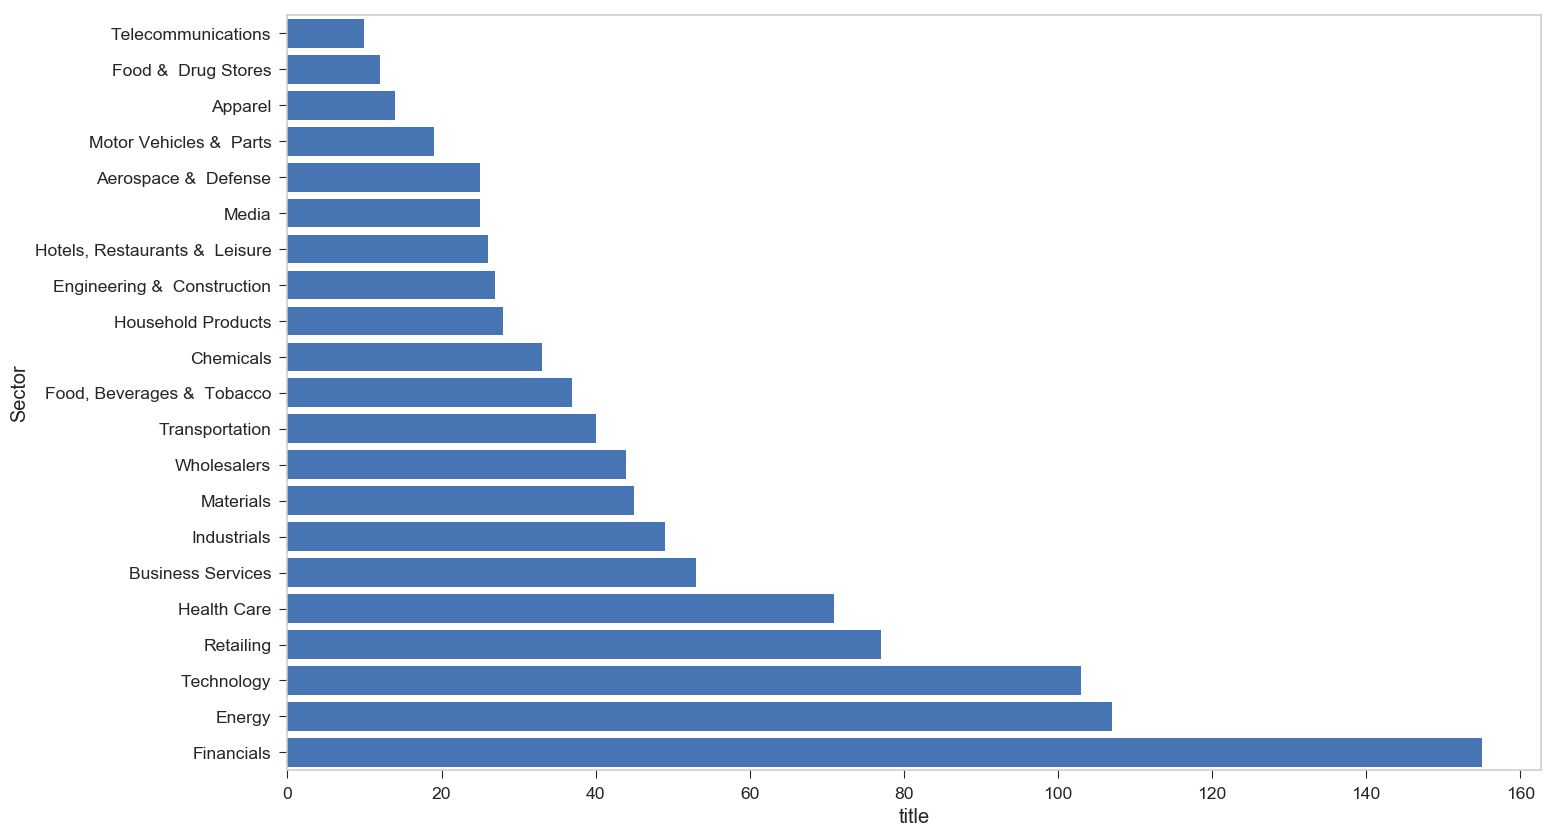

In [24]:
sns.barplot(y="Sector", x="title", data=count,
            label="Alcohol-involved", color="b")

In [58]:
def p2f(x):
    try:
        a = float(x.strip('%'))/100
    except:
        print(x)
        a = None
    return a

In [59]:
data["Revenue Change_p2f"] = data["Revenue Change"].apply(p2f)

-
-
-
-
-


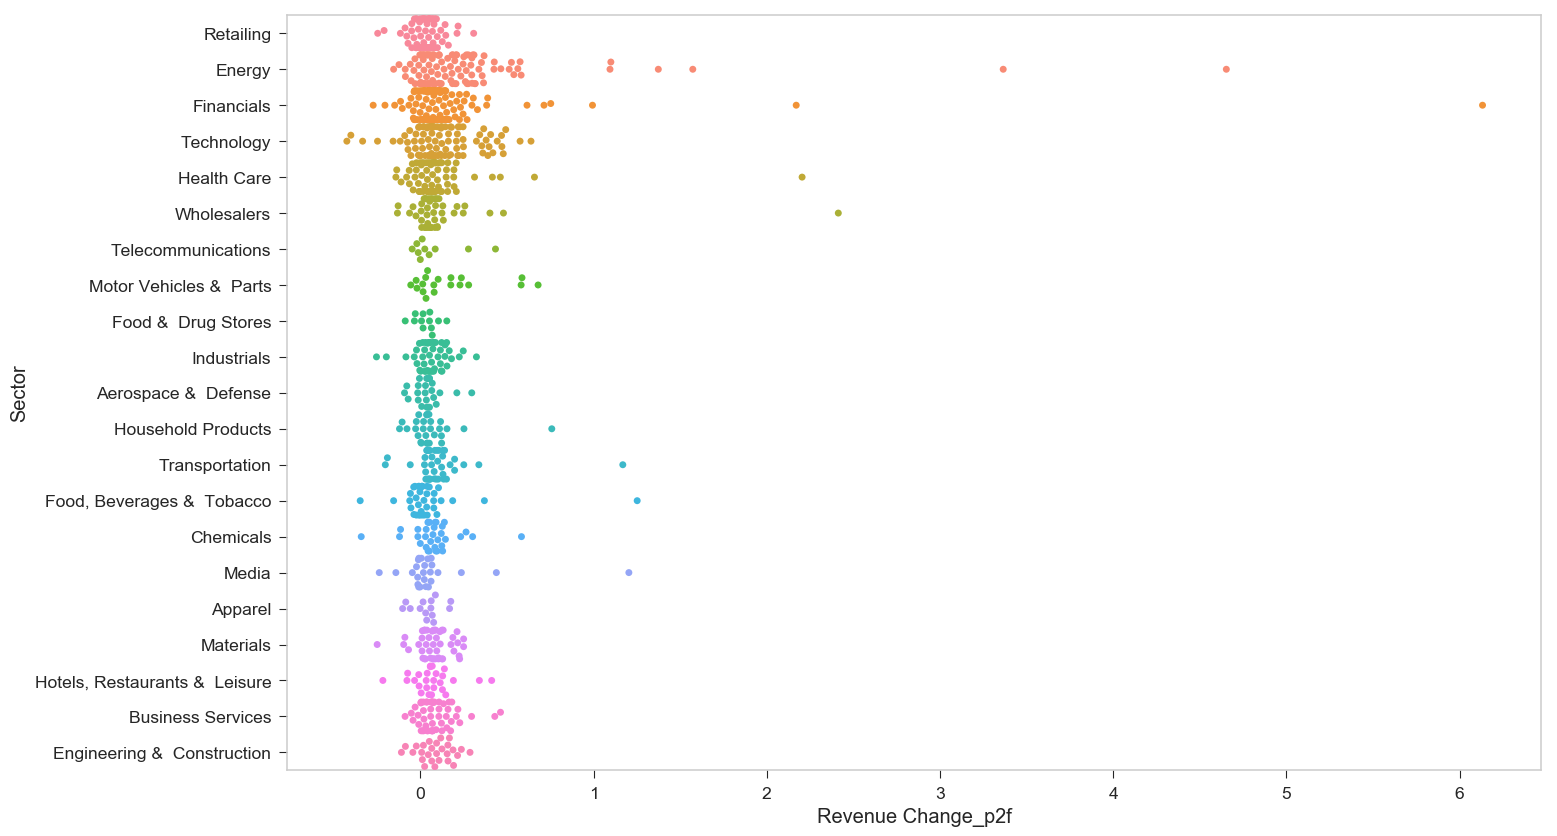

In [57]:
sns.swarmplot(x="Revenue Change_p2f", y="Sector", data=data)

In [60]:
data.sort_values(["Revenue Change_p2f"])

,rank,title,Previous Rank,Revenues ($M),Revenue Change,Profits ($M),Profit Change,Assets ($M),Mkt Value as of 3/29/18 ($M),Employees,CEO,CEO Title,Sector,Industry,Years on Fortune 500 List,City,State,Latitude,Longitude,Revenue Change_p2f
106,107,Hewlett Packard Enterprise,59,"$28,871",-42.40%,$344.00,-89.10%,"$61,406","$27,243","66,000",Antonio Neri,"President, Chief Executive Officer & Director",Technology,"Computers, Office Equipment",2,Palo Alto,CA,37.441883,-122.143020,-0.424
290,291,Xerox,162,"$10,265",-40.10%,$195.00,-,"$15,946","$7,330","36,100",John Visentin,Chairman & Chief Executive Officer,Technology,"Computers, Office Equipment",24,Norwalk,CT,41.117744,-73.408158,-0.401
320,321,Conagra Brands,197,"$9,235",-34.70%,$639.30,-,"$10,096","$14,776","12,600",Sean M. Connolly,"President, Chief Executive Officer & Director","Food, Beverages & Tobacco",Food Consumer Products,24,Chicago,IL,41.878114,-87.629798,-0.347
704,705,Ashland Global Holdings,516,"$3,260",-34.10%,$1.00,-,"$8,618","$4,343","6,500",William A. Wulfsohn,Chairman & Chief Executive Officer,Chemicals,Chemicals,-,Covington,KY,39.083671,-84.508554,-0.341
948,949,EchoStar,719,"$2,039",-33.30%,$392.60,118.20%,"$8,750","$5,061","2,100",Michael T. Dugan,"President, Chief Executive Officer & Director",Technology,Network and Other Communications Equipment,-,Englewood,CO,39.647765,-104.987760,-0.333
999,1000,HCP,798,"$1,848",-27.20%,$414.20,-34.00%,"$14,089","$10,910",190,Thomas M. Herzog,"President, Chief Executive Officer & Director",Financials,Real estate,-,Irvine,CA,33.684567,-117.826505,-0.272
571,572,Terex,445,"$4,363",-25.30%,$128.70,-,"$3,463","$3,030","10,700",John L. Garrison Jr.,"President, Chief Executive Officer & Director",Industrials,Construction and Farm Machinery,-,Westport,CT,41.141472,-73.357905,-0.253
707,708,USG,566,"$3,204",-24.90%,$88.00,-82.70%,"$3,851","$5,664","6,800",Jennifer F. Scanlon,"President, Chief Executive Officer & Director",Materials,"Building Materials, Glass",-,Chicago,IL,41.878114,-87.629798,-0.249
585,586,Symantec,465,"$4,191",-24.70%,($106.00),-104.30%,"$18,174","$16,067","13,000",Gregory S. Clark,Chairman & Chief Executive Officer,Technology,Computer Software,-,Mountain View,CA,37.386052,-122.083851,-0.247
171,172,Sears Holdings,127,"$16,702",-24.60%,($383.00),-,"$7,262",$288,"89,000",Edward S. Lampert,Chairman & Chief Executive Officer,Retailing,General Merchandisers,24,Hoffman Estates,IL,42.062991,-88.122720,-0.246
